In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
import matplotlib.pyplot as plt

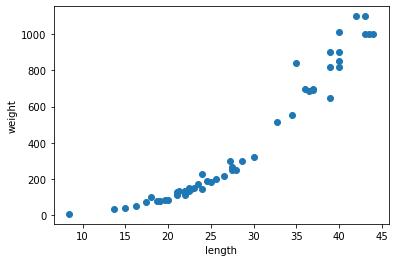

In [5]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 훈련/테스트 세트 나누기 ###

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state=42 )

In [36]:
train_input.shape, test_input.shape#1차원 배열 : 원소가 1개인 튜플로 나타남

((42,), (14,))

In [14]:
# 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 함
# 넘파이로 2차원 배열 크기 지정

In [16]:
# 예시
test_array = np.array([1,2,3,4])
test_array = test_array.reshape(2, 2)

In [17]:
test_array.shape

(2, 2)

In [18]:
test_array

array([[1, 2],
       [3, 4]])

In [19]:
# 원소갯수가 다를 경우 오류남
# 넘파이는 배열의 크기를 자동으로 지정하는 기능 제공 -1로 지정 시, 나머지 원소 개수로 채우기
# ->배열의 전체 원소개수를 매번 외우지 않아도 돼서 편리

In [37]:
train_input = train_input.reshape(-1, 1)

In [38]:
test_input = test_input.reshape(-1, 1)

In [39]:
train_input.shape, test_input.shape

((42, 1), (14, 1))

### 모델 훈련 ###

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [41]:
#회귀 알고리즘 클래스, 객체 생성
knr = KNeighborsRegressor()

In [43]:
knr.fit(train_input, train_target)#훈련

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [44]:
#테스트로 평가 측정 
knr.score(test_input, test_target)#결정계수(R2)

0.9928094061010639

In [45]:
# R2 = I - (타깃-예측)제곱의 합 / (타깃-평균)제곱의 합
# 예측이 타깃에 가까워지면 분자가 0에 가까워져서 1에 가까운 값이 됨
# 정확도나 결정계수가 높을 수록 좋음

In [46]:
# 결정계수가 얼마나 좋은지 이해하기 어려움, 
# 타깃과 예측한 값 차이 구해서 어느 정도 예측이 벗어났는지 가늠하기

In [47]:
from sklearn.metrics import mean_absolute_error

In [48]:
# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

In [49]:
# 테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [50]:
# 결과에서 예측이 평균적으로 19g 정도 타깃값과 다름
# 훈련세트-> 모델 훈련, 테스트 세트 -> 모델 평가
# 그렇다면 훈련세트를 평가해보면?

In [51]:
knr.score(train_input, train_target)

0.9698823289099255

In [52]:
# 테스트 세트 성능 > 훈련 세트
# 왜 그런걸까?

In [54]:
# 훈련세트 점수> 테스트 세트 점수 일때, 과대적합, 새로운 샘플에 대한 예측 x
# 훈련세트 점수 < 테스트 세트 점수이거나, 두 점수 모두 낮을때 과소적합, 모델이 너무 단순해서 훈련 세트에 적절히 훈련되지 x
# 또는 훈련, 테스트 세트 크기가 매우 작을 때 과소적합 발생

In [55]:
# 과소적합 문제 해결하기
# 모델을 좀 더 복잡, 정교하게 만들기 k-최근접 이웃에서는 Kneighbors 개수를 줄이면 됨
# 갯수를 줄이면 일부분 데이터의 변화에 민감해짐, 갯수를 늘리면 일반적 패턴 따를 것임

In [56]:
# 이웃 개수 3개 설정
knr.n_neighbors = 3

In [57]:
# 모델 훈련
knr.fit(train_input, train_target)
knr.score(train_input, train_target)#훈련세트 스코어

0.9804899950518966

In [58]:
knr.score(test_input, test_target)#테스트세트 스코어
#과소적합 문제 해결, 두 점수 차이가 크지 않으므로 과대적합 x

0.974645996398761

## 확인 문제 ##

In [59]:
# 객체 생성
knr = KNeighborsRegressor()

In [61]:
# 5에서 45까지 x좌표 만들기
x = np.arange(5, 45).reshape(-1, 1)

In [67]:
x.shape

(40, 1)

In [70]:
# n=1, 5, 10일 때 예측 결과를 그래프로 그리기
for n in [1, 5, 10]:
# 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
#     지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

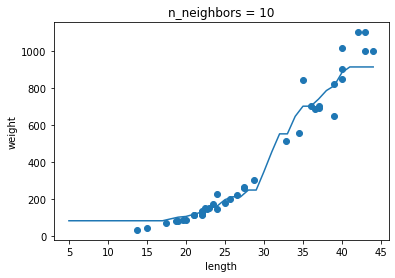

In [71]:
# 훈련 세트와 예측 결과를 그래프로 그리기
plt.scatter(train_input, train_target)
plt.plot(x, prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()